In [1]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util


TensorFlow version: 2.15.0


In [2]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [3]:
model = MultiPoleModel(moments=3, lrate=0.00025, optimizer='adam', loss='mse', scale=1e9, early_stop=False, target_stop=4)
test_epochs = 2000

In [4]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 40352.68
epoch  1 --- Loss --- 39912.92
epoch  2 --- Loss --- 39487.047
epoch  3 --- Loss --- 39064.746
epoch  4 --- Loss --- 38646.48
epoch  5 --- Loss --- 38232.43
epoch  6 --- Loss --- 37822.633
epoch  7 --- Loss --- 37417.066
epoch  8 --- Loss --- 37015.67
epoch  9 --- Loss --- 36618.367
epoch  10 --- Loss --- 36225.06
epoch  11 --- Loss --- 35835.66
epoch  12 --- Loss --- 35450.07
epoch  13 --- Loss --- 35068.207
epoch  14 --- Loss --- 34689.97
epoch  15 --- Loss --- 34315.27
epoch  16 --- Loss --- 33944.023
epoch  17 --- Loss --- 33576.152
epoch  18 --- Loss --- 33211.574
epoch  19 --- Loss --- 32850.223
epoch  20 --- Loss --- 32492.035
epoch  21 --- Loss --- 32136.963
epoch  22 --- Loss --- 31784.953
epoch  23 --- Loss --- 31435.98
epoch  24 --- Loss --- 31090.006
epoch  25 --- Loss --- 30747.004
epoch  26 --- Loss --- 30406.95
epoch  27 --- Loss --- 30069.824
epoch  28 --- Loss --- 29735.611
epoch  29 --- Loss --- 29404.29
epoch  30 --- Loss --- 29075.846


In [5]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 65.92330512603124 minutes


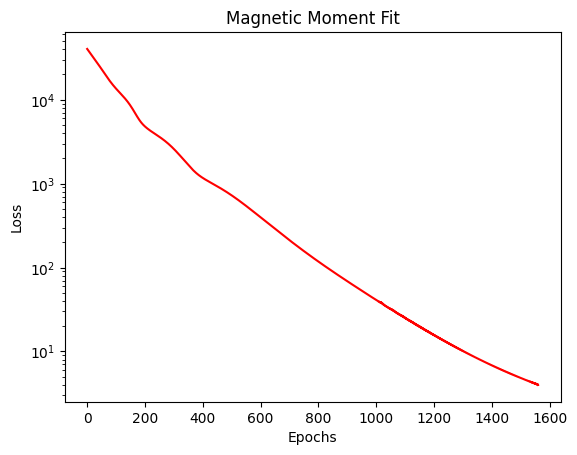

In [6]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
model.moment()

---- Moment  0 -----
Position:  [[ 0.5058161   0.00091373 -0.00445962]]
Value:     [[ 0.9535851  -0.00594147  0.03452739]]
---- Moment  1 -----
Position:  [[-0.00373951 -0.03147899  0.17258734]]
Value:     [[-0.02573555  0.07911567  2.5732882 ]]
---- Moment  2 -----
Position:  [[-0.00857433  0.25678506 -0.02363222]]
Value:     [[0.07889707 1.8614221  0.40647003]]
